##### Aprendizaje para determinar Cuerpos Celestes

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df2 = pd.read_csv("../datos/SDSS-DR14.csv")
df2.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Podemos determinar que gran cantidad de datos forman parte de un formato numérico, por lo que no presentará problemas en la comparación y representación de los mismos.

In [4]:
df2.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Logramos ver ademas que basado en al dataset en su complejidad, no nos daría inconsistencias en cuanto al exceso de ruido que ésto pueda generar.

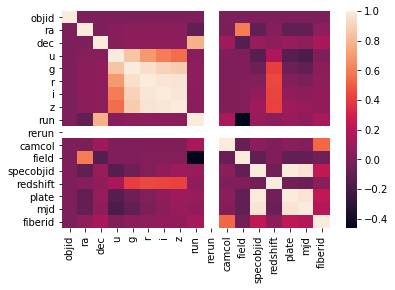

In [5]:
sb.heatmap(df2.corr())
df2_data = df2

Se logra visualizar que "rerun" presenta una relación muy alta de dependencia con las demás variables, y ésto podría presentar problemas en el proceso de aprendizaje

In [6]:
df2_data = df2_data.drop(['rerun'],axis=1)

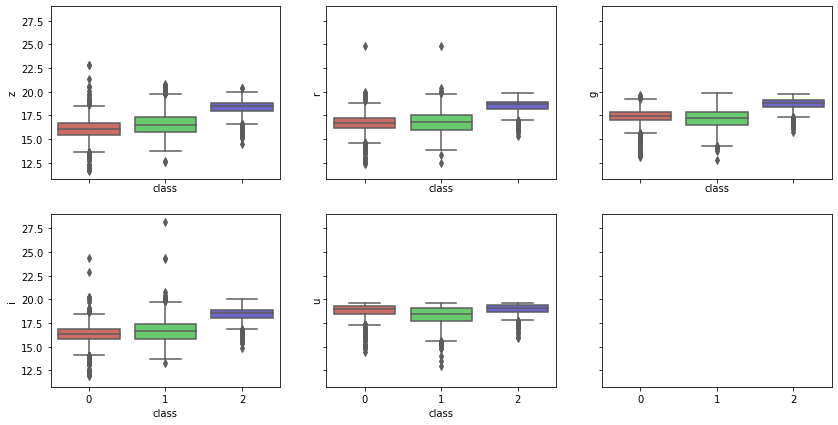

In [18]:
fig, axes = plt.subplots(2, 3,figsize=(14,7), sharex=True, sharey=True)
sb.boxplot(palette='hls', data=df2_data,x="class", y='z',ax=axes[0,0])
sb.boxplot(palette='hls', data=df2_data,x="class", y='r',ax=axes[0,1])
sb.boxplot(palette='hls', data=df2_data,x="class", y='g',ax=axes[0,2])
sb.boxplot(palette='hls', data=df2_data,x="class", y='i',ax=axes[1,0])
sb.boxplot(palette='hls', data=df2_data,x="class", y='u',ax=axes[1,1])

En estos diagramas de cajas para las propiedades de luz, las medias no se encuentran muy alejadas de sus cotas, no así sus valores extremos, por lo que podremos ver si la variabilidad nos ayuda en los procesos de clasificacion

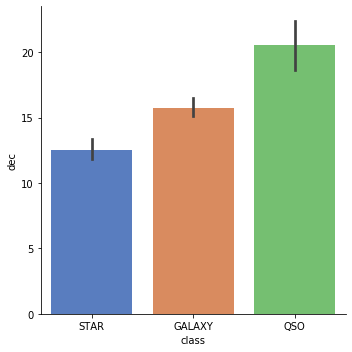

In [8]:
sb.catplot(palette='muted', kind='bar',data=df2_data,x="class", y='dec')

Con los siguientes datos, cuales presentan un grado de relación muy alto entre ellas, indicándonos una tendencia creciente sobre el objeto que se permite ver.

### Transformación de clases a variables numéricas

In [9]:
df2_data.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [10]:
df2_class = df2_data[['class']]

In [11]:
#galaxia_data_clean.shape
#Cambiamos categorización de la columna 'class' discreta numérica
for n in range(df2_class.shape[0]):
    if df2_class.ix[n,0] =='GALAXY':
        df2_class.ix[n,0] = 0
    elif df2_class.ix[n,0] =='STAR':
        df2_class.ix[n,0] = 1
    elif df2_class.ix[n,0] =='QSO':
        df2_class.ix[n,0] = 2
df2_class.head()

,class
0,1
1,1
2,0
3,1
4,1


In [12]:
df2_full = df2_data.drop(['class'],axis=1)
df2_data = pd.concat([df2_class,df2_full],axis=1)

In [13]:
df2_data.head()

,class,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,0,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,1,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,1,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512


### Proceso de entrenamiento y clasificación

In [14]:
X = df2_data.ix[:,1:df2_data.shape[1]].values
y = df2_data.ix[:,0].values

In [15]:
#Realizando Entrenamiento a 70% de acierto
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=25)

In [16]:
from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#y genera un vector de predicciones a partir de xtest

#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
#permite comparar la test de prediccion con la prediccion real

print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1194    2   12]
 [   6 1083    2]
 [  22    0  179]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1208
           1       1.00      0.99      1.00      1091
           2       0.93      0.89      0.91       201

    accuracy                           0.98      2500
   macro avg       0.97      0.96      0.96      2500
weighted avg       0.98      0.98      0.98      2500



In [17]:
from sklearn.externals.six import StringIO
import pydot #sudo apt install python3-pydot graphviz

dot_data = StringIO()

features=['objid', 'ra', 'dec','u','g','r','i','z', 'run', 'rerun', 
          'camcol', 'field', 'specobjid', 'redshift','plate ', 'mjd', 'fiberid']
classes=['0','1','2']
tree.export_graphviz(clf,out_file=dot_data,feature_names=features,class_names=classes, filled=True, 
                     rounded=True, impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png('modelo_GLX.png')

ValueError: Length of feature_names, 17 does not match number of features, 16